In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
mlt.style.use('fivethirtyeight')





In [2]:
#importing the dataset
dataset1 = pd.read_csv('ball_by_ball_data.csv')
dataset2 = pd.read_csv('key_teams.csv')
dataset3 = pd.read_csv('match_data.csv')
dataset4 = pd.read_csv('player_rosters.csv')

In [3]:
#total match played
print('Total Matches Played:',dataset3.shape[0])
print(' \n Venues Played At:',dataset3['city'].unique())     
print(' \n Teams :',dataset3['team1_id'].unique())

Total Matches Played: 636
 
 Venues Played At: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']
 
 Teams : ['KKR' 'CSK' 'RR' 'MI' 'DC' 'KXI' 'RCB' 'DD' 'KTK' 'PW' 'SRH' 'RPS' 'GL']


In [4]:
#total venues where matches are played
print('Total venues played at:',dataset3['city'].nunique())

Total venues played at: 30


In [5]:
#win by max runs
df=dataset3.iloc[[dataset3['win_by_runs'].idxmax()]]
df[['season','team1_id','team2_id','winner','win_by_runs']]
 

,season,team1_id,team2_id,winner,win_by_runs
620,2017,MI,DD,MI,146


In [6]:
#max win by wicket.
df=dataset3.iloc[[dataset3['win_by_wickets'].idxmax()]]
df[['season','team1_id','team2_id','winner','win_by_wickets']]

,season,team1_id,team2_id,winner,win_by_wickets
12,2008,MI,DC,DC,10


In [7]:
#most man of the match awards.
print((dataset3['player_of_match'].value_counts()).idxmax())

Chris Gayle


In [8]:
# percent of decisoin for batting/bowling after toss win
print('Toss Decisions in %\n',((dataset3['toss_decision']).value_counts())/636*100)
 


Toss Decisions in %
 field    57.075472
bat      42.924528
Name: toss_decision, dtype: float64


In [9]:
#total no. of super over
dataset1[dataset1['is_super_over']==1]['match_id'].nunique()

7

In [10]:
#percent when toss winner is winner according to teams
dataset3[dataset3['toss_winner']==dataset3['winner']]['winner'].value_counts()/dataset3['toss_winner'].value_counts()

CSK    0.636364
DC     0.441860
DD     0.458333
GL     0.666667
KKR    0.564103
KTK    0.500000
KXI    0.411765
MI     0.564706
PW     0.150000
RCB    0.500000
RPS    0.615385
RR     0.539683
SRH    0.485714
dtype: float64

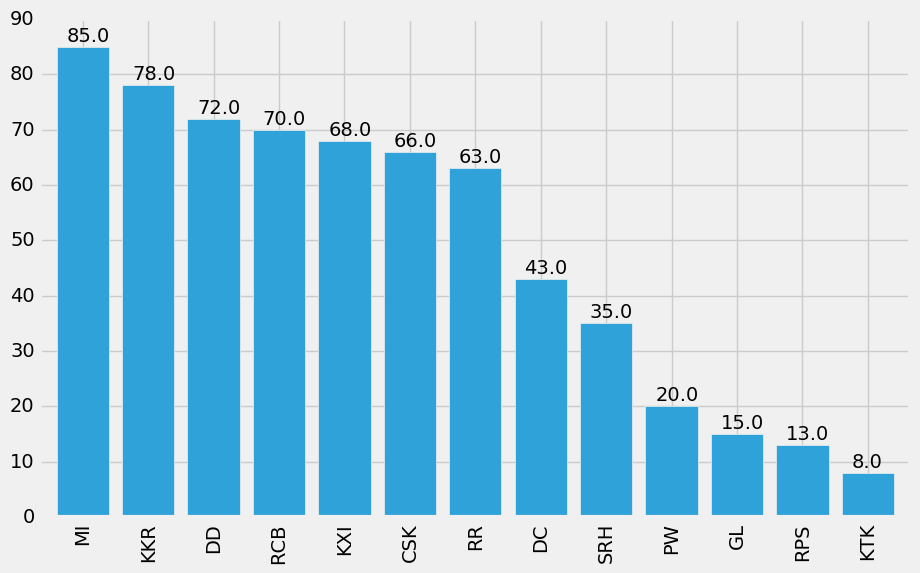

In [11]:
#no. of times each team win toss
mlt.subplots(figsize=(10,6))
ax=dataset3['toss_winner'].value_counts().plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
mlt.show()

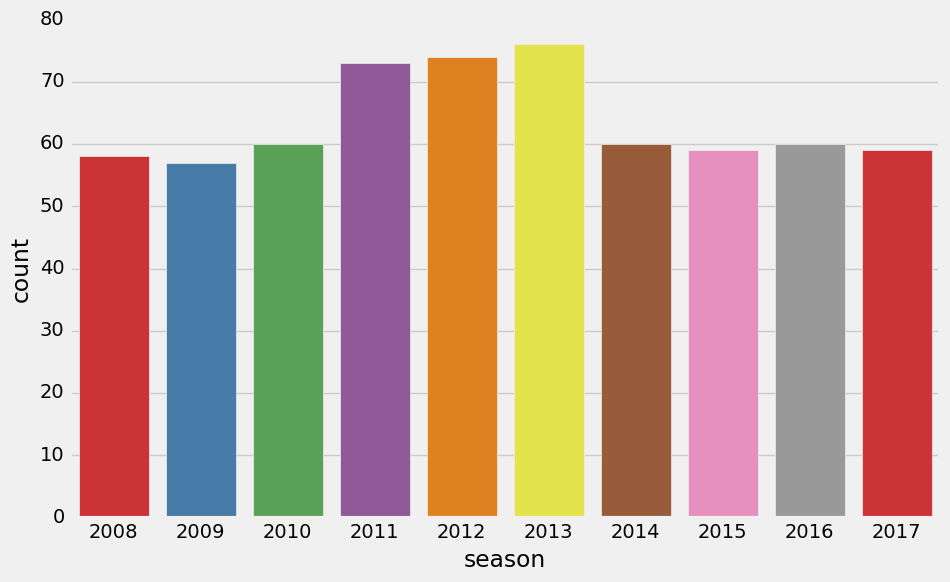

In [12]:
#no. of matches in each season 
mlt.subplots(figsize=(10,6))
sns.countplot(x='season',data=dataset3,palette="Set1")  #countplot automatically counts the frequency of an item
mlt.show()

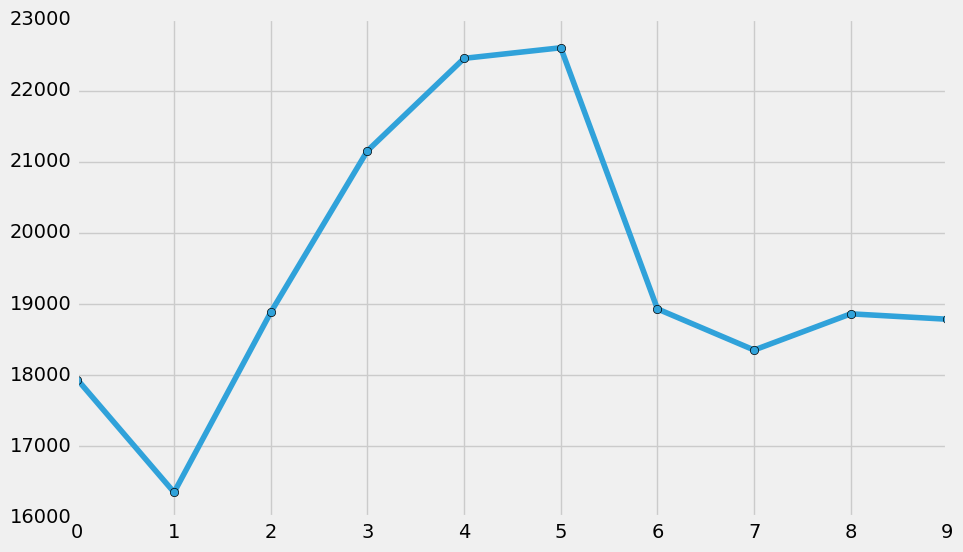

In [13]:
#no. of runs each season
mlt.subplots(figsize=(10,6))
batsmen = dataset3[['match_id','season']].merge(dataset1, left_on = 'match_id', right_on = 'match_id', how = 'left')
#merging the matches and delivery dataframe by referencing the id and match_id columns respectively
batsmen['total_runs']=batsmen['batsman_runs']+batsmen ['extra_runs']
season=batsmen.groupby(['season'])['total_runs'].sum().reset_index()
season['total_runs'].plot(marker='o')
mlt.show()

In [14]:
#matches each season
matches_each_season=dataset3.groupby(['season']).count().match_id.reset_index()
matches_each_season

,season,match_id
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [15]:
# avg runs of all teams when they bat first
dataset1['total_runs']= dataset1['batsman_runs']+dataset1['extra_runs']
xyz=dataset1.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index() 
xyz.drop('match_id',axis=1,inplace=True) 
xyz = xyz.groupby(['inning','batting_team'])['total_runs'].mean().reset_index()
innings_one = xyz[xyz['inning']==1]
innings_one.drop('inning',axis=1,inplace=True)
innings_one

C:\Users\abhinav tyagi\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,batting_team,total_runs
0,CSK,164.844156
1,DC,157.325581
2,DD,152.777778
3,GL,161.928571
4,KKR,155.029412
5,KTK,144.142857
6,KXI,159.584416
7,MI,163.256098
8,PW,148.650000
9,RCB,167.214286


In [66]:
#avg runs per match of all teams when they bat second
dataset1['total_runs']= dataset1['batsman_runs']+dataset1['extra_runs'] 
xyz=dataset1.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index() 
xyz.drop('match_id',axis=1,inplace=True) 
xyz = xyz.groupby(['inning','batting_team'])['total_runs'].mean().reset_index() 
innings_two = xyz[xyz['inning']==2] 
innings_two.drop('inning',axis=1,inplace=True) 
innings_two

C:\Users\abhinav tyagi\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,batting_team,total_runs
13,CSK,151.796296
14,DC,146.812500
15,DD,146.630952
16,GL,161.812500
17,KKR,142.462500
18,KTK,127.428571
19,KXI,151.478873
20,MI,148.306667
21,PW,135.400000
22,RCB,142.695122


In [16]:
#avg run per run in each season
season['total_runs']/matches_each_season ['match_id']

0    309.258621
1    286.894737
2    314.716667
3    289.780822
4    303.418919
5    297.394737
6    315.516667
7    311.067797
8    314.366667
9    318.406780
dtype: float64

In [18]:
# season wise winner.
for i in range(2008,2017):
 df=((dataset3[dataset3['season']==i]).iloc[-1]) 
 print(df[[1,10]])

season    2008
winner      RR
Name: 57, dtype: object
season    2009
winner      DC
Name: 114, dtype: object
season    2010
winner     CSK
Name: 174, dtype: object
season    2011
winner     CSK
Name: 247, dtype: object
season    2012
winner     KKR
Name: 321, dtype: object
season    2013
winner      MI
Name: 397, dtype: object
season    2014
winner     KKR
Name: 457, dtype: object
season    2015
winner      MI
Name: 516, dtype: object
season    2016
winner     SRH
Name: 576, dtype: object


# Batting Analysis

In [ ]:
# total batsman runs as per match
batsman1=dataset1.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()

In [20]:

dataset1['batsman_']=dataset1['batsman']

In [21]:
#total match balls as per match
batsman2=dataset1.groupby(['match_id','batsman_'])['batsman'].count().reset_index()
batsman2=batsman2.rename(columns={'batsman':'balls'}) 
batsman2=batsman2.rename(columns={'match_id':'matchid__'}) 

In [22]:
#joining the two
batsman1 = pd.concat([batsman1, batsman2], axis=1, join='inner')

In [23]:
batsman1=batsman1.drop('batsman_', axis=1)
batsman1=batsman1.drop('matchid__', axis=1)
batsman1.head()

,match_id,batsman,batsman_runs,balls
0,2008_1,Ashley Noffke,9,12
1,2008_1,Balachandra Akhil,0,2
2,2008_1,Brendon McCullum,158,77
3,2008_1,Cameron White,6,10
4,2008_1,David Hussey,12,12


In [24]:
hundreds=batsman1[batsman1['batsman_runs']>100]


In [25]:
fifties=batsman1[(batsman1['batsman_runs']<100 )& (batsman1['batsman_runs']>=50)]

In [26]:
#All hundreds in IPL
hundreds

,match_id,batsman,batsman_runs,balls
2,2008_1,Brendon McCullum,158,77
67,2008_13,Adam Gilchrist,109,50
179,2008_2,Michael Hussey,116,54
465,2008_37,Sanath Jayasuriya,114,53
478,2008_38,Shaun Marsh,115,72
868,2008_9,Andrew Symonds,117,57
1638,2009_54,Manish Pandey,114,74
1723,2009_8,AB De Villiers,105,54
2041,2010_26,David Warner,107,72
2153,2010_32,Murali Vijay,127,57


In [27]:
# All 150+ in IPL
one50s=batsman1[batsman1['batsman_runs']>150]
one50s

,match_id,batsman,batsman_runs,balls
2,2008_1,Brendon McCullum,158,77
5199,2013_30,Chris Gayle,175,69


In [28]:
#All nervous 90s in IPL
nervous90s=batsman1[(batsman1['batsman_runs']>=90) &( batsman1['batsman_runs']<100)]
nervous90s

,match_id,batsman,batsman_runs,balls
24,2008_10,Kumar Sangakkara,94,58
407,2008_33,Sourav Ganguly,91,58
696,2008_51,Graeme Smith,91,52
849,2008_7,Virender Sehwag,94,43
1092,2009_20,Suresh Raina,98,57
1790,2010_11,Matthew Hayden,93,46
2154,2010_32,Naman Ojha,94,57
2470,2010_51,Mahela Jayawardene,93,65
2925,2011_25,Shaun Marsh,95,47
3600,2011_66,Shikhar Dhawan,95,59


In [29]:
#finding dismissal of all match
dismissal=dataset1.groupby(['match_id','batsman'])['dismissal_kind'].count().reset_index()
dismissal.drop('match_id',axis=1)
dismissal['batsman_']=dismissal['batsman']
dismissal=dismissal.rename(columns={'match_id':'matchid__'})
dismissal=dismissal.rename(columns={'batsman':'batsman:'}) 
dismissal.head()


,matchid__,batsman:,dismissal_kind,batsman_
0,2008_1,Ashley Noffke,1,Ashley Noffke
1,2008_1,Balachandra Akhil,1,Balachandra Akhil
2,2008_1,Brendon McCullum,0,Brendon McCullum
3,2008_1,Cameron White,1,Cameron White
4,2008_1,David Hussey,1,David Hussey


In [30]:
# dismissal column with 
batsman1 = pd.concat([batsman1, dismissal], axis=1, join='inner')
batsman1=batsman1.drop('matchid__',axis=1)
batsman1=batsman1.drop('batsman:',axis=1)
batsman1=batsman1.drop('batsman_',axis=1)
batsman1.head()

,match_id,batsman,batsman_runs,balls,dismissal_kind
0,2008_1,Ashley Noffke,9,12,1
1,2008_1,Balachandra Akhil,0,2,1
2,2008_1,Brendon McCullum,158,77,0
3,2008_1,Cameron White,6,10,1
4,2008_1,David Hussey,12,12,1


In [31]:
#batsman total runs
batsmantotal=dataset1.groupby(['batsman'])['batsman_runs'].sum().reset_index()


In [32]:
#batsmantotal balls
batsmantotalballs=dataset1.groupby(['batsman_'])['batsman'].count().reset_index()
batsmantotalballs=batsmantotalballs.rename(columns={'batsman':'balls'})


In [33]:
#joining batsman balls and runs
temp = pd.concat([batsmantotal, batsmantotalballs], axis=1, join='inner')


In [34]:
#total runs and balls for all batsman
temp=temp.drop('batsman_',axis=1)

temp.head()

,batsman,batsman_runs,balls
0,AB De Villiers,3486,2402
1,Aakash Chopra,53,75
2,Aaron Finch,1604,1270
3,Abdur Razzak,0,2
4,Abhimanyu Mithun,34,26


In [35]:
#finding strike rate
temp['strike rate']= temp['batsman_runs']/temp['balls']*100


In [36]:
#finding total innings
temp2=dataset1.groupby(['match_id','batsman'])['is_super_over'].sum().reset_index()

temp3=dataset1.groupby(['match_id','bowler'])['is_super_over'].sum().reset_index()

temp2_=temp2['batsman'].value_counts().reset_index()

temp3_=temp3['bowler'].value_counts().reset_index()

In [37]:
# merging innings column to batsman dataset
temp2_=temp2_.rename(columns={'batsman':'innings'})
temp4=pd.merge(temp,temp2_,left_on='batsman',right_on='index',how='left')

In [38]:
temp4=temp4.drop('index',axis=1)
temp4.head()

,batsman,batsman_runs,balls,strike rate,innings
0,AB De Villiers,3486,2402,145.129059,118
1,Aakash Chopra,53,75,70.666667,6
2,Aaron Finch,1604,1270,126.299213,64
3,Abdur Razzak,0,2,0.000000,1
4,Abhimanyu Mithun,34,26,130.769231,6


In [39]:
#adding no. of times out and avg columnn
batsman___=batsman1.groupby(['batsman'])['dismissal_kind'].sum().reset_index()
batsman___=pd.merge(temp4,batsman___, left_on='batsman',right_on='batsman',how='inner')
batsman___=batsman___.rename(columns={'dismissal_kind':'no._of_times_out'})
batsman___['average']=batsman___['batsman_runs']/batsman___['no._of_times_out']
batsman___.head()

,batsman,batsman_runs,balls,strike rate,innings,no._of_times_out,average
0,AB De Villiers,3486,2402,145.129059,118,85,41.011765
1,Aakash Chopra,53,75,70.666667,6,5,10.600000
2,Aaron Finch,1604,1270,126.299213,64,58,27.655172
3,Abdur Razzak,0,2,0.000000,1,0,NaN
4,Abhimanyu Mithun,34,26,130.769231,6,5,6.800000


In [40]:
#highest of individual batsman
highest=batsman1.groupby(['batsman'])['batsman_runs'].max().reset_index()
highest=highest.rename(columns={'batsman_runs':'highest'})
highest.head()

,batsman,highest
0,AB De Villiers,133
1,Aakash Chopra,24
2,Aaron Finch,88
3,Abdur Razzak,0
4,Abhimanyu Mithun,11


In [41]:
#adding highest column
batsman___=pd.merge(batsman___,highest,left_on='batsman',right_on='batsman',how='inner')
batsman___.head()

,batsman,batsman_runs,balls,strike rate,innings,no._of_times_out,average,highest
0,AB De Villiers,3486,2402,145.129059,118,85,41.011765,133
1,Aakash Chopra,53,75,70.666667,6,5,10.600000,24
2,Aaron Finch,1604,1270,126.299213,64,58,27.655172,88
3,Abdur Razzak,0,2,0.000000,1,0,NaN,0
4,Abhimanyu Mithun,34,26,130.769231,6,5,6.800000,11


In [42]:
# no of times hundreds by all batsman
hundreds
hundreds_=hundreds['batsman'].value_counts().reset_index()
hundreds_.head()


,index,batsman
0,Chris Gayle,5
1,David Warner,3
2,AB De Villiers,3
3,Virat Kohli,3
4,Virender Sehwag,2


In [43]:
#merging hundreds column to batsman
batsman___1=pd.merge(batsman___,hundreds_,left_on='batsman',right_on='index',how='outer')
batsman___1=batsman___1.rename(columns={'batsman_x':'batsman','batsman_y':'hundreds'})
batsman=batsman___1.drop('index',axis=1)
batsman.head()

,batsman,batsman_runs,balls,strike rate,innings,no._of_times_out,average,highest,hundreds
0,AB De Villiers,3486,2402,145.129059,118,85,41.011765,133,3.0
1,Aakash Chopra,53,75,70.666667,6,5,10.600000,24,NaN
2,Aaron Finch,1604,1270,126.299213,64,58,27.655172,88,NaN
3,Abdur Razzak,0,2,0.000000,1,0,NaN,0,NaN
4,Abhimanyu Mithun,34,26,130.769231,6,5,6.800000,11,NaN


In [44]:
# no. of fifties by all batsman
fifties_=fifties['batsman'].value_counts().reset_index()
 

In [45]:
#merging 50s column to batsman
batsman___1=pd.merge(batsman___,fifties_,left_on='batsman',right_on='index',how='outer')
batsman___1
batsman___1=batsman___1.rename(columns={'batsman_x':'batsman','batsman_y':'fifties'})
batsman11=batsman___1.drop('index',axis=1)
batsman34=pd.merge(batsman,batsman11[['fifties','batsman']],on='batsman')

# Coming batting record of all the batsman

In [46]:
#complete record of all the batsman
batsman=batsman34
batsman


,batsman,batsman_runs,balls,strike rate,innings,no._of_times_out,average,highest,hundreds,fifties
0,AB De Villiers,3486,2402,145.129059,118,85,41.011765,133,3.0,23.0
1,Aakash Chopra,53,75,70.666667,6,5,10.600000,24,NaN,NaN
2,Aaron Finch,1604,1270,126.299213,64,58,27.655172,88,NaN,13.0
3,Abdur Razzak,0,2,0.000000,1,0,NaN,0,NaN,NaN
4,Abhimanyu Mithun,34,26,130.769231,6,5,6.800000,11,NaN,NaN
5,Abhinav Mukund,19,23,82.608696,2,2,9.500000,19,NaN,NaN
6,Abhishek Jhunjhunwala,217,218,99.541284,15,14,15.500000,53,NaN,1.0
7,Abhishek Nayar,672,588,114.285714,50,39,17.230769,45,NaN,NaN
8,Abhishek Raut,194,172,112.790698,16,11,17.636364,36,NaN,NaN
9,Abu Nechim,36,27,133.333333,6,1,36.000000,18,NaN,NaN


# Bowling Analysis

In [47]:
#runs and extra runs given by a bowler
bowler=dataset1.groupby(['bowler'])['batsman_runs'].sum().reset_index()
bowler1=dataset1.groupby(['bowler'])['extra_runs'].sum().reset_index()
bowler_=pd.merge(bowler,bowler1,on='bowler')
bowler_.head()

,bowler,batsman_runs,extra_runs
0,Aaron Finch,66,1
1,Aavishkar Salvi,190,15
2,Abdur Razzak,23,6
3,Abhimanyu Mithun,448,29
4,Abhishek Jhunjhunwala,126,4


In [48]:
#total runs given by a bowler
bowler_['runs']=bowler_['batsman_runs']+bowler_['extra_runs']
bowler_=bowler_.drop('batsman_runs',axis=1)
bowler_=bowler_.drop('extra_runs',axis=1)

In [49]:
bowler_.head()

,bowler,runs
0,Aaron Finch,67
1,Aavishkar Salvi,205
2,Abdur Razzak,29
3,Abhimanyu Mithun,477
4,Abhishek Jhunjhunwala,130


In [50]:
#total balls bowled by bowler
bowlerballs=dataset1.groupby(['bowler'])['batsman_runs'].count().reset_index()
bowlerballs=bowlerballs.rename(columns={'batsman_runs':'balls'})

In [51]:
bowler=pd.merge(bowler_,bowlerballs[['bowler' ,'balls']],on='bowler')
bowler.head()

,bowler,runs,balls
0,Aaron Finch,67,44
1,Aavishkar Salvi,205,156
2,Abdur Razzak,29,14
3,Abhimanyu Mithun,477,312
4,Abhishek Jhunjhunwala,130,88


In [52]:
#bowler wickets
data=dataset1[dataset1['dismissal_kind']!='run out']
bowlerwickets=data.groupby(['bowler'])['dismissal_kind'].count().reset_index()
bowlerwickets.head()

,bowler,dismissal_kind
0,Aaron Finch,1
1,Aavishkar Salvi,7
2,Abdur Razzak,0
3,Abhimanyu Mithun,7
4,Abhishek Jhunjhunwala,1


In [53]:
#adding wickets column 
bowler=pd.merge(bowler,bowlerwickets[['bowler' ,'dismissal_kind']],on='bowler')
bowler=bowler.rename(columns={'dismissal_kind':'wickets'})
bowler.head()

,bowler,runs,balls,wickets
0,Aaron Finch,67,44,1
1,Aavishkar Salvi,205,156,7
2,Abdur Razzak,29,14,0
3,Abhimanyu Mithun,477,312,7
4,Abhishek Jhunjhunwala,130,88,1


# Complete bowling record of all players

In [68]:
#Bowling record of all bowlers
bowler['economy']=bowler['runs']/bowler['balls']*(6)
bowler['average']=bowler['runs']/bowler['wickets']
bowler['strike rate']=bowler['balls']/bowler['wickets']
bowler 

,bowler,runs,balls,wickets,average,strike rate,economy
0,Aaron Finch,67,44,1,67.000000,44.000000,9.136364
1,Aavishkar Salvi,205,156,7,29.285714,22.285714,7.884615
2,Abdur Razzak,29,14,0,inf,inf,12.428571
3,Abhimanyu Mithun,477,312,7,68.142857,44.571429,9.173077
4,Abhishek Jhunjhunwala,130,88,1,130.000000,88.000000,8.863636


In [55]:
# batsman runs scored w.r.t team win in that match or not
run_win=dataset1.groupby(['match_id','batting_team','batsman'])['batsman_runs'].sum().reset_index()
run_win=pd.merge(run_win,dataset3[['match_id','winner']],on='match_id')
run_win

,match_id,batting_team,batsman,batsman_runs,winner
0,2008_1,KKR,Brendon McCullum,158,KKR
1,2008_1,KKR,David Hussey,12,KKR
2,2008_1,KKR,Mohammad Hafeez,5,KKR
3,2008_1,KKR,Ricky Ponting,20,KKR
4,2008_1,KKR,Sourav Ganguly,10,KKR
5,2008_1,RCB,Ashley Noffke,9,KKR
6,2008_1,RCB,Balachandra Akhil,0,KKR
7,2008_1,RCB,Cameron White,6,KKR
8,2008_1,RCB,Jacques Kallis,8,KKR
9,2008_1,RCB,Mark Boucher,7,KKR


In [56]:
#all the matches in which Brendon McCullum scores more than 50 and his team wins
run_win[((run_win['batsman']=='Brendon McCullum')&(run_win['batsman_runs']>50)) &(run_win['batting_team']==run_win['winner'])]

,match_id,batting_team,batsman,batsman_runs,winner
0,2008_1,KKR,Brendon McCullum,158,KKR
1542,2009_49,KKR,Brendon McCullum,81,KKR
2537,2010_56,KKR,Brendon McCullum,57,KKR
2733,2011_13,KTK,Brendon McCullum,81,KTK
4406,2012_50,KKR,Brendon McCullum,56,KKR
6055,2014_13,CSK,Brendon McCullum,71,CSK
6194,2014_21,CSK,Brendon McCullum,56,CSK
7128,2015_25,CSK,Brendon McCullum,66,CSK
7371,2015_4,CSK,Brendon McCullum,100,CSK
7467,2015_46,CSK,Brendon McCullum,81,CSK


In [57]:
len(run_win[((run_win['batsman']=='Rahul Dravid')&(run_win['batsman_runs']>50)) &(run_win['batting_team']==run_win['winner'])])/len(run_win[((run_win['batsman']=='Rahul Dravid')&(run_win['batsman_runs']>50))])*100

45.45454545454545

In [58]:
# function that determines winning percentage if a batsman scores more than 50
def winning_per_batsman_scores_50(x):
 print(len(run_win[((run_win['batsman']==x)&(run_win['batsman_runs']>50)) &(run_win['batting_team']==run_win['winner'])])/len(run_win[((run_win['batsman']==x)&(run_win['batsman_runs']>50))])*100)

# Chances of winning when different players scores more than 50 

In [59]:
#chances of winning when brendon mccullum scores more than 50
winning_per_batsman_scores_50('Brendon McCullum')

73.33333333333333


In [60]:
#chances of winning when MS dhoni scores more than 50
winning_per_batsman_scores_50('Mahendra Singh Dhoni')

76.47058823529412


In [61]:
#chances of winning when viru scores more than 50
winning_per_batsman_scores_50('Virender Sehwag')

70.58823529411765


In [62]:
#chances of winning when virat scores more than 50
winning_per_batsman_scores_50('Virat Kohli')

52.94117647058824


In [63]:
#chances of winning when Chris gayle scores more than 50
winning_per_batsman_scores_50('Chris Gayle')

66.66666666666666


In [64]:
#chances of winning when dhawan scores more than 50
winning_per_batsman_scores_50('Shikhar Dhawan')

56.52173913043478


In [65]:
#chances of winning when AB scores more than 50
winning_per_batsman_scores_50('AB De Villiers')

69.56521739130434
